<center>
    <img src="images/logo.jpg" width="150" alt="EPYTHON LAB logo"  />
</center>

# Introduction to Probability Distribution for Machine Learning

> ## What is probability?

>The probability of an event refers to the **likelihood that the event will occur**. Mathematically, the probability that an event will occur is expressed as a number between **0 and 1**. Notionally, the probability of event `A` is represented by `P(A)`. If `P(A)` equals `0`, event `A` will almost definitely not occur.

>### is Probability used in ML?

> Probability is the **Bedrock of Machine Learning**

> Algorithms are designed using probability (e.g. Naive Bayes). 

> Learning algorithms will make decisions using probability (e.g. information gain). 

> Sub-fields of study are built on probability (e.g. Bayesian networks).

<hr>

## Random Variables
> represent random events

>**Exampple**: we could use a random variable to represent the outcome of a `die roll`: any number between `one` and `six`.

Example: a Coin flip -> assigning `head` a value of 1 and `tail` a value of 0

We will use `random.choice(a, size, replace=True/False)` from the `numpy` library

> `a` is a list or other object that has values we are sampling from

> `size` is a number that represents how many values to choose

> `replace` can be equal to `True or False`, and determines whether we keep a value in a after drawing it `(replace = True)` or remove it from the pool `(replace = False)`.

Let's try to see the outcome of rolling a fair die twice using `np.random.choice()`

In [19]:
# Write your code here
import numpy as np
die_6 = range(1, 7) # 7 is not included
num_rolls = 2

result_1 = np.random.choice(die_6, size=num_rolls, replace=True)
print(result_1)

[6 5]


What could be the outcome if we rolling the die 5 times?

In [20]:
# write your code here
result_2 = np.random.choice(die_6, size=5, replace=True)
print(result_2)

[2 3 1 4 4]


Example 2: Create a 12 sided die rolling 10 times.

In [21]:
# write your code here
die_12 = range(1, 13)
num_rolls = 10
result_3 = np.random.choice(die_12, size=num_rolls, replace=True)
print(result_3)

[ 6 12  3  6 10  1  2  8  9 11]


## Discrete and Continuous Random Variables


> ### Discrete Random Variables
> with a countable number of possible values

Example: rolling a regular 6-sided die would be considered a discrete random variable because the outcome options are limited to the numbers on the die.

<img src="images/die_6.gif">

>## Continuous Random Variable
> when the possible values of a random variable are uncountable

> measurement variables because measurement variables are more precise. example:meters, centimeters, millimeters, etc


For example, the temperature in Addis Ababa on a randomly chosen day is a continuous random variable. We can always be more precise about the temperature by expanding to another decimal place `(96 degrees, 96.44 degrees, 96.437 degrees, etc.)`.

**Question**

1. Suppose you have a random variable that represents the time it takes a randomly selected person to run a mile. **Is this variable discrete or continuous?** 

2. Suppose you have a random variable that represents the individual pieces of candy a randomly selected child receives on a candy-giving holiday. **Is this variable discrete or continuous?**


**N.B:** Post your answer in the comment box ex: 1. continuous if the answer is continuous else discrete


<hr>

> ## Binomial Distribution

**Binomial distribution** is one of the most popular distributions in statistics, along with normal distribution. 
> It is a Discrete Distribution. It describes the outcome of binary scenarios, e.g. toss of a coin, it will either be **head or tails**.

- Binomial distribution is a discrete probability distribution of a number of successes `(X)` in a sequence of independent experiments `(n)`

- Each experiment has two possible outcomes: **success and failure**. Success outcome has a probability `p`, and failure has probability `(1−p)`.

### Calculating Probabilities using Python

For example, suppose we flip a fair coin 10 times and count the number of heads. We can use the `binom.pmf()` function to calculate the probability of observing 6 heads as follows:

In [1]:
# import scipy here 
import scipy.stats as st

**Note**: **SciPy** provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many more...

In [3]:
# write youre code here
n = 10
x = 6
p = 0.5
prob_1 = st.binom.pmf(x, n, p)
print(prob_1)
print(1-prob_1)

0.2050781249999999
0.7949218750000001


**Note: A probability mass function (PMF)** is a type of probability distribution that defines the probability of observing a particular value of a discrete random variable. <BR>
This method takes three values:
> `x` the value of interest<br>
> `n` the number of trials<br>
> `p` the probability of success in each trial

Plot the probability of flip a fair coin

In [2]:
from matplotlib import pyplot as plt
import ipywidgets as widgets


In [3]:
@widgets.interact(x=widgets.IntSlider(min=1, max=10, step=1, value=10,description='Trials'))
def plot_prob(x):
    prob = []
    for i in range(0, 11):
        prob.append(st.binom.pmf(i, x, 0.5))
    # plot
    plt.figure(figsize=(6, 3))
    plt.bar(range(0, 11), prob, color='#2f4f4f')
    plt.xlabel('Number of Heads')
    plt.ylabel('Probability')
    plt.grid()
    plt.xticks(range(0, 11))
    plt.show()

interactive(children=(IntSlider(value=10, description='Trials', max=10, min=1), Output()), _dom_classes=('widg…

**Notice** that as `x` increases,  the bars get smaller. This is because the sum of the heights of all the bars will always equal `1`. So when x is larger, the number of heads we can observe increases, and the probability needs to be divided between more values.

### Calculating Probability over a range

Example: Suppose we flip a fair coin 5 times, and want to know the probability of getting between 1 and 3 heads.

- We can calculate this using the following equation where `P(x)` is the probability of observing the number `x` successes (heads in this case):

\begin{aligned} P(1\;to\;3\;heads) = P(1 <= X <= 3) \\ P(1\;to\;3\;heads) = P(X=1) + P(X=2) + P(X=3) \\ \\P(1\;to\;3\;heads) = 0.1562 + 0.3125 + 0.3125 \\ P(1\;to\;3\;heads) = 0.7812 \end{aligned} 



In [4]:
# write your code
import scipy.stats as stats

prob = stats.binom.pmf(1, 5, 0.5 ) + stats.binom.pmf(2, 5, 0.5) + stats.binom.pmf(3, 5, 0.5)
print(prob)

0.7812499999999996


In [4]:
prob = []
for i in range(1, 4):
    prob.append(stats.binom.pmf(i, 5, 0.5))
    
print(sum(prob))

0.7812499999999996


Example 2: If we want to know the probability of observing 8 or fewer heads from 10 coin flips, we need to add up the values from 0 to 8:


\begin{aligned} P(0\;to\;8\;heads) + P(9\;to\;10\;heads) = P(0\;to\;10\;heads) = 1 \\ P(0\;to\;8\;heads) = 1 - P(9\;to\;10\;heads) \end{aligned}


In [5]:
# Write your code here

prob = 1 - stats.binom.pmf(9, 10, 0.5)
print(prob)

0.990234375


We can visualize this scenario with the probability mass function: we flip a fair coin 10 times, and want to know the probability of getting between 1 and 3 heads. We can visualize this scenario with the probability mass function:

In [6]:
from matplotlib import pyplot as plt
import ipywidgets as widgets


In [5]:
@widgets.interact(x=widgets.IntRangeSlider(value=[1, 3], min=0, max=10,
                                          description='Heads:'))
def plot_prob(x):
    
    prob_1 = [] # calculate probability 0 to 10
    prob_2 = [] # probability in the range
    for i in range(0, 11):
        prob_1.append(stats.binom.pmf(i, 10, 0.5))
        
    #print(sum(prob_1))
    for i in range(x[0], x[1]+1):
        prob_2.append(stats.binom.pmf(i, 10, 0.5))
    print("Probability of between {} and {} heads: {}%". format(x[0], x[1],
                                                               round(sum(prob_2)* 100, 2)))
    # let's visualize bar plot
    plt.figure(figsize=(6, 3))
    plt.bar(range(0, 11), prob_1, color='#2f4f4f')
    plt.bar(range(x[0], x[1]+1), prob_2, color='green')
    plt.title("Binomial Distribution: Calculating Probability over a Range")
    plt.ylabel('Probability')
    plt.xlabel('Number of Heads')
    plt.xticks(range(0, 11))
    plt.grid()
    plt.show()
    

interactive(children=(IntRangeSlider(value=(1, 3), description='Heads:', max=10), Output()), _dom_classes=('wi…

## Cumulative Distribution Function

> derived from the **probability mass function**.

> However, instead of the probability of observing a specific value, the cumulative distribution function gives the probability of observing a specific value **OR LESS**.

As previously discussed, the probabilities for all possible values in a given probability distribution add up to 1. The value of a cumulative distribution function at a given value is equal to the sum of the probabilities lower than it, with a value of 1 for the largest possible number.

```{math}
If x1 < x2 →CDF(x1) < CDF(x2)
```

### Calculating using cumulative distribution function in Python

**Example 1**: Calculating the probability of observing 3 or fewer heads from 10 fair coin flips (0 to 3 heads) mathematically looks like the following:

```{math}
P(3 or fewer heads) = P(0 to 3 heads)
```

In [16]:
# import scipy.stats
import scipy.stats as stats

In [17]:
# write your code here
prob_1 = stats.binom.cdf(3, 10, 0.5)
print(prob_1)

0.171875


In [18]:
# compare to pmf
prob_1 = stats.binom.pmf(0, 10, 0.5) + stats.binom.pmf(1, 10, 0.5) +\
stats.binom.pmf(2, 10, 0.5) + stats.binom.pmf(3, 10, 0.5)
print(prob_1)

0.17187500000000006


We can use `binom.cdf()` method from the `scipy.stats` library to calculate the cumulative distribution function. This method takes 3 values:

`x`: the value of interest, looking for the probability of this value or less <br>
`n`: the sample size<br>
`p`: the probability of success

**Example 2**: Calculating the probability of observing between 4 and 8 heads from 10 fair coin flips can be thought of as taking the difference of the value of the cumulative distribution function at 8 from the cumulative distribution function at 3:

```{math}
P(4 to 8 Heads) = P(0 to 8 Heads) - P(0 to 3 Heads)
```

In [19]:
# write your code here
prob_2 = stats.binom.cdf(8, 10, 0.5) - stats.binom.cdf(3, 10, 0.5)
print(prob_2)

0.8173828125


**Example 3**: To calculate the probability of observing more than 6 heads from 10 fair coin flips we subtract the value of the cumulative distribution function at 6 from 1. Mathematically, this looks like the following:

```{math}
P(more than 6 heads) = 1 - P(6 or fewer heads)
```

In [21]:
# write your code here
prob_3 = 1- stats.binom.cdf(6, 10, 0.5)
print(prob_3)

0.171875


Note that “more than 6 heads” does not include 6.

## Probability Density Functions

> define the probability distributions of continuous random variables and span across all possible values that the given random variable can take on.

![image.webp](images/pdf.webp)

We can calculate the area under the curve using the cumulative distribution function for the given probability function.


For example, heights fall under a type of probability distribution called a **normal distribution**. The parameters for the normal distribution are the **mean and the standard deviation, and we use the form Normal(mean, standard deviation)** as shorthand.

We know that women’s heights have a mean of 167.64 cm with a standard deviation of 8 cm, which makes them fall under the Normal(167.64, 8) distribution.

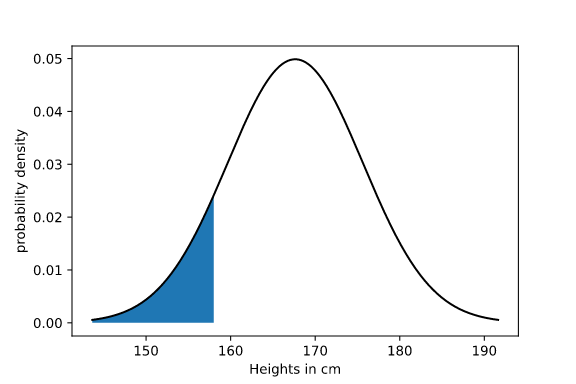

Let’s say we want to know the probability that a randomly chosen woman is less than 158 cm tall. We can use the cumulative distribution function to calculate the area under the probability density function curve from 0 to 158 to find that probability.

We can calculate the area of the blue region in Python using the `norm.cdf(x, loc, scale)` method from the `scipy.stats` library. This method takes on 3 values:

`x`: the value of interest<br>
`loc`: the mean of the probability distribution<br>
`scale`: the standard deviation of the probability distribution

In [1]:
# import scipy.stats
import scipy.stats as stats

In [2]:
# write your code here
prob = stats.norm.cdf(158, 167.4, 8)
print(prob)

0.11999735789901239


### Probability Density Functions and Cumulative Distribution Function

We can take the difference between two overlapping ranges to calculate the probability that a random selection will be within a range of values for continuous distributions. This is essentially the same process as calculating the probability of a range of values for discrete distributions.

**Example 1**: The weather in the Addis Ababa follows a Normal distribution with a mean of 20 degrees Celcius and a standard deviation of 3 degrees.

What is  the probability that the weather on a randomly selected day will be between 18 to 25 degrees Celcius?`


In [3]:
# write your code here
prob = stats.norm.cdf(25, 20, 3) - stats.norm.cdf(18, 20, 3)
print(prob)

0.6997171101802624


**Example 2:** Using the same weather information about the Addis Ababa, and find the probability that the weather on a randomly selected day will be greater than 24 degrees Celsius.

In [4]:
# write your code here
prob = 1- stats.norm.cdf(24, 20, 3)
print(prob)

0.09121121972586788


## Summary

We've finished our introduction to probability distributions for Machine Learning

- We've covered about different types of random variables

- Calculated the probability of specific events using probability mass functions (discrete random variable)

- Calculated the probability of ranges using probability mass functions and cumulative distribution functions (discrete random variable)

- Calculated the probability of ranges using probability density functions and cumulative distribution functions (continuous random variable)


**Exercises 1** : sampling from a 12-sided die - randomly select 5 

In [7]:
# write your code here
import numpy as np
res = np.random.choice(range(1, 13), 5, replace=True)
print(res)

[ 9  7  9 11  6]


**Exercise 2**:

find probability of 6 heads from 10 fair coin flips using binomial probability mass function

In [8]:
# write your code here
import scipy.stats as stats
prob = stats.binom.pmf(6, 10, 0.5)
print(prob)

0.2050781249999999


**Exercise 3**:

1. find probability of between 2 to 4 heads from 10 coin flips using binomial probability mass function

`P(X = 2) + P(X = 3) + P(X = 4)`

In [9]:
# write your code here
prob = stats.binom.pmf(2, 10, 0.5) +\
stats.binom.pmf(3, 10, 0.5) + \
stats.binom.pmf(4, 10, 0.5)

print(prob)


0.36621093749999994


2. find probability of between 0 to 8 heads from 10 coin flips

`1 - (P(X = 9) + P(X = 10))`

In [10]:
prob = 1- stats.binom.pmf(9, 10, 0.5) + stats.binom.pmf(10, 10, 0.5)
print(prob)

0.9912109375


In [12]:
# write your code here
prob = stats.binom.cdf(8, 10, 0.5)
print(prob)

0.9892578125


**Exercise 4**:
1. find probability of 6 or fewer heads from 10 coin flips using binomial cumulative distribution function


In [11]:
# write your code here
prob = stats.binom.cdf(6, 10, 0.5)
print(prob)

0.828125


2. find probability of  more than 6 heads from 10 coin flips



In [13]:
# write your code here
prob = 1- stats.binom.cdf(6, 10, 0.5)
print(prob)

0.171875


3. find probability of between 4 and 8 heads from 10 coin flips

In [14]:
# write your code here
prob = stats.binom.cdf(8, 10, 0.5) - stats.binom.cdf(4, 10, 0.5)
print(prob)

0.6123046875


**Exercise 5**:
The weather in the Addis Ababa follows a Normal distribution with a mean of 20 degrees Celcius and a standard deviation of 3.

1.  what is probability of temprature being less than 14*C


In [15]:
# write your code here
prob = stats.norm.cdf(14, 20, 3)
print(prob)

0.022750131948179195


2. what is probability of temprature being greater than 24*C 

In [16]:
# write your code here
prob = 1- stats.norm.cdf(24, 20, 3)
print(prob)


0.09121121972586788


3. what is probability of temprature between 21*C and  25*C

In [17]:
# write your code here

prob = stats.norm.cdf(25, 20, 3) - stats.norm.cdf(21, 20, 3)
print(prob)

0.32165098790894897


<hr>

*Copyright &copy; 2022 EPYTHON LAB.  All rights reserved.*